<a href="https://colab.research.google.com/github/maxashoka3/Machine-learning/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Impoting importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###### *Reading dataset from google drive*

In [2]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/EDA project - airbnb/Copy of Airbnb NYC 2019.csv')

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

###Understanging Dataset





*   *id ->* Reference number of the rental property/apartment assigned by Airbnb
*  *name ->* Name of apartment or house 
*  *host id ->* Reference number of the host or the ownwer of the property
*   *host name ->* Name of the host or owner of the apartment
*  *neighbourhood group ->* Name of the group of neighbourhoods
* *neighbourhood ->* Name of the neighbourhod
* *latitude ->* Latitude of the location of the apartment
* *longitude ->* Longitude of the location of the apartment
* *room type ->* Type of room that the apartment provides to rent
* *price ->* Price of the room/apartment 
* *minimum nights ->* Number of minimum nights a customer has to book to rent the room/apartment
* *number of reviews ->* Number of total reviews the apartment/property has received
* *last reveiw ->* The last date in which the apartment received a review
* *reveiws per month ->* Average how many reviews the apartment gets
* *calculated host listing ->* Number of Property a host has listed for rental on Airbnb
* *avalilability_365 ->* Number of days a hotel/apartment is availabe in next 365 days



In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Checking Categorical values and numerical values



In [ ]:
#checking object type
list(df.select_dtypes(include = 'object').columns)

In [ ]:
#checking other type 
list(df.select_dtypes(exclude = 'object').columns)

### Understanding the relation between 

1.   Id
2.   Name
3.   host_id
4.   host name
5.   Hosting name





**Checking The Dublicate Value**


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['id'].duplicated().sum()

0

In [ ]:
df['name'].duplicated().sum()
#means therea are serveral hotel name with same name 

989

In [ ]:
#checking duplication value in host_id

df['host_id'].duplicated().sum()

11438

In [ ]:
df['host_name'].nunique()

11452

In [ ]:
df['host_name'].duplicated().sum()

37442

**We can say that that host id and 
host name have duplicate value
 But we cannot remove it Becasuse a single host can have multiple properties**

 ### The relation



In [ ]:
# Relation between the host_name and name(property name)

In [ ]:
df[df['host_name'] ==df['name']].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0.00,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90


In [ ]:
df[df['host_name'] ==df['name']].count()

id                                26
name                              26
host_id                           26
host_name                         26
neighbourhood_group               26
neighbourhood                     26
latitude                          26
longitude                         26
room_type                         26
price                             26
minimum_nights                    26
number_of_reviews                 26
reviews_per_month                 26
calculated_host_listings_count    26
availability_365                  26
dtype: int64

**Note** : 26 hotel and host name are same

In [ ]:
df[['host_name','name']].isnull().values.any()

False

We have found out that there are several hotels and their host name which are same and even have duplicate value in them. 

So we need to check whether the duplicate name in host name are same person or different person

In [ ]:
df.loc[df['host_name'] == 'John']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,0.00,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,0.00,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,0.00,2,176


In [ ]:
df[df['host_name'] == 'John']['id'].nunique()

294

In [ ]:
df.loc[df['host_id'] ==2787]

so we can observe from the table that we have 294 number of John and we see that different host_id  has different property in different locality and in different areas..
So furter analysis can be continued with host Id

#### Top 10 host with most number of hotel branch

In [131]:
top_10_hostname = df.groupby(['host_id','host_name'])['name'].count().sort_values(ascending=False).head(5).reset_index()
top_10_hostname

,host_id,host_name,name
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,16098958,Jeremy & Laura,96


In [ ]:
# so this code doesnt give us the exact top 10 host name but the most repetative name
df['host_name'].value_counts()[:5]

##### Top 10 Busiest Hotel

In [135]:
 #on the basis availability and number of review 
 df_a =df[df['availability_365'] == 0]

In [136]:
busiest_hosts = df_a .groupby(['host_name',
                                'host_id',
                                'room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
16219,Wanda,792159,Private room,480
6219,Gurpreet Singh,22959695,Private room,424
4405,Deloris,121391142,Private room,368
16057,Veronica,21641206,Private room,351
6963,James,1649300,Entire home/apt,320
9350,Kyle,22210080,Private room,318
4687,Dragan,1787284,Private room,304
8912,Kc,51954926,Private room,255
8635,Karen,663764,Private room,248
2389,Brian,2494666,Private room,248


### Finding the corelation

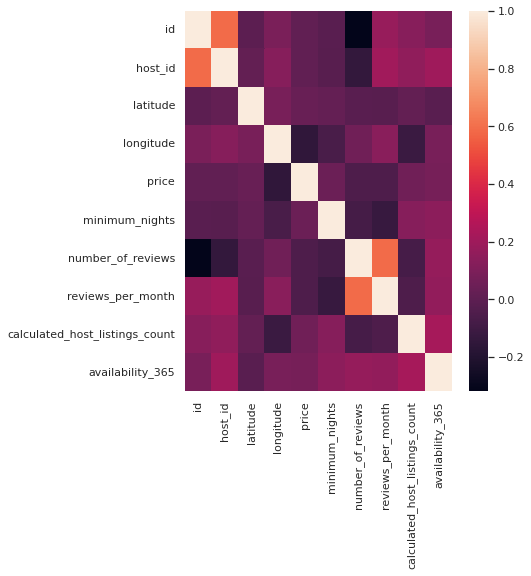

In [134]:
#correlation
#correlation matrix
f, ax = plt.subplots(figsize=(6, 7))
sns.heatmap(df.corr());
#There is highly corelation between the id and number of review but clearly it does not make any sense to it


### Uni Varient Analysis

#### Price Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


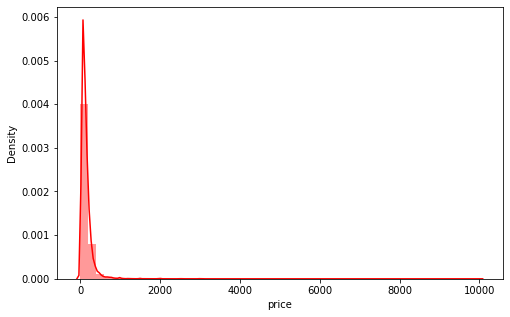

In [ ]:
sns.distplot(df['price'], hist = True,color ='r')

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


from the distribution plot we can say that our value have the sharpe edge and there is too much of the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


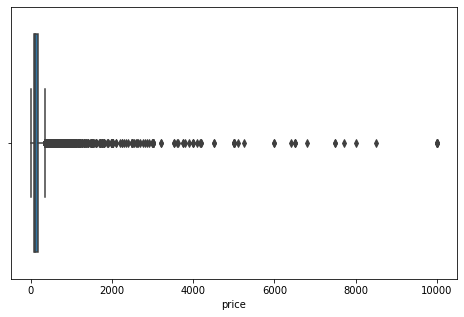

In [ ]:
sns.boxplot(df['price'])

**It is very hard to understand graph because there is too much presence of the outliers so we need to remove the outlier**

In [ ]:
df['price'].isna().any()

False

#### Removing outliers

In [34]:
#copying the dataframe
df_1 = df.copy()

In [52]:
#defing outlier's range function function
def df_range(col):
  sorted(col)
  Q1,Q3 = np.percentile(col , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
 
  return lower_range,upper_range


In [53]:
#getting_upper,lower bound
lower_bound,upper_bound = df_range(df_1['price'])

In [54]:
#removing outlier on the basis of the  lower bound, upper bound
df_1.drop(df_1[ (df_1.price > upper_bound) | (df_1.price< lower_bound) ].index , inplace=True)

In [ ]:
df_1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


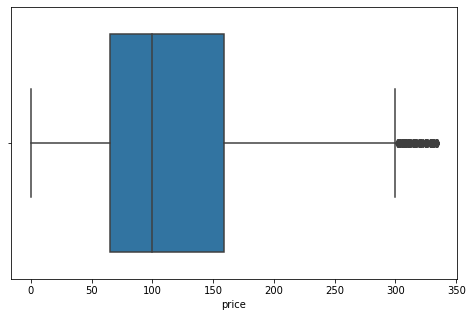

In [55]:
sns.boxplot(df_1['price'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


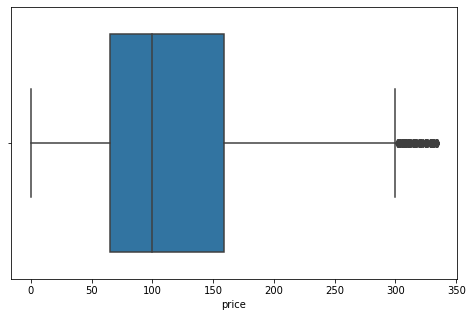

In [58]:
sns.boxplot(df_1['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


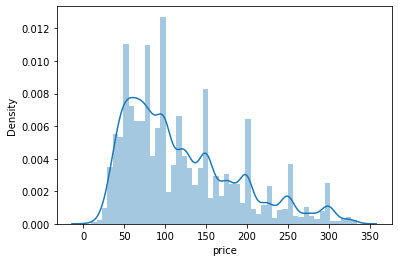

In [15]:
sns.distplot(df_1['price'])

#### Handling Nan and missing Values

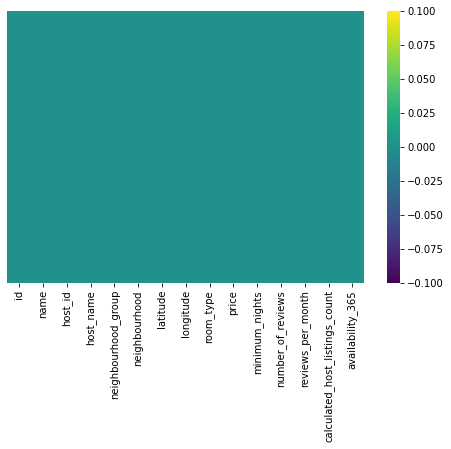

In [60]:
#checking null values
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

In [45]:
#we are droping the last review as it contain large number of null
df.drop('last_review',axis = 1 ,inplace = True)

In [46]:
#replacing Nan values with 0 in reviews_per_month
df.fillna({'reviews_per_month':0}, inplace=True)


In [47]:
#replacing 'null' value with unknown 
df['name'].fillna('unknown',inplace = True)
df['host_name'].fillna('unknown_host',inplace =True)
df[['host_name']].isnull().any()

host_name    False
dtype: bool

In [48]:
df[['name']].isnull().any()

name    False
dtype: bool

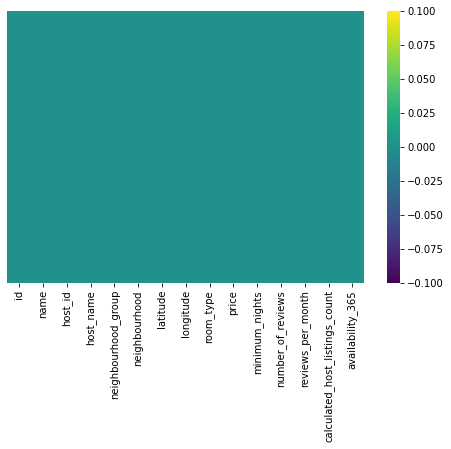

In [49]:
#checking null values
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

In [50]:
df.isnull().values.sum()

0

#### Availabiltiy

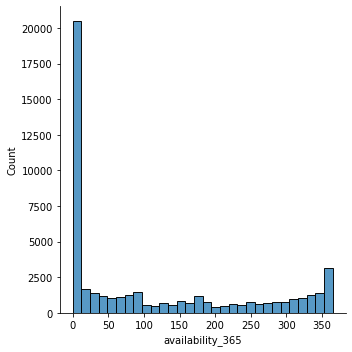

In [36]:
#distribution of availability at NYC!
sns.displot(df['availability_365'])

#### review_per_month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


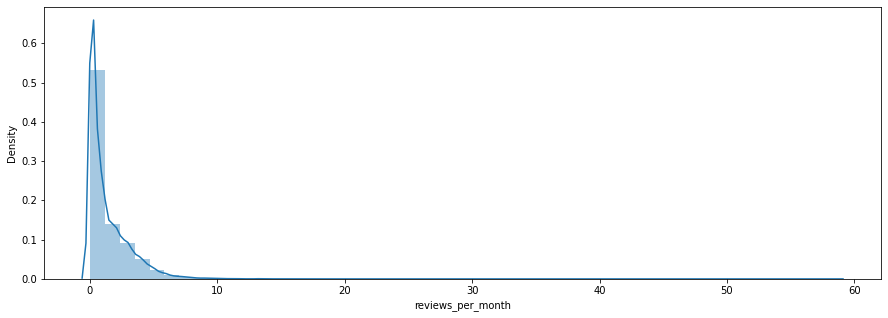

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['reviews_per_month'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['reviews_per_month'].skew())
print("Kurtosis: %f" % df['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large no of outliers



Skewness: 3.130189
Kurtosis: 42.493469


#### Top ten Neighborhood

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count')

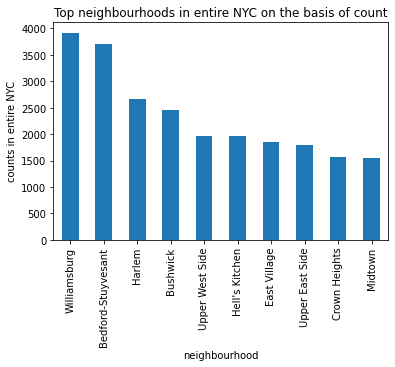

In [40]:
top_10_neigbours= df['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count')

## ByVaraiant analysis

#### Minimum_nights vs price

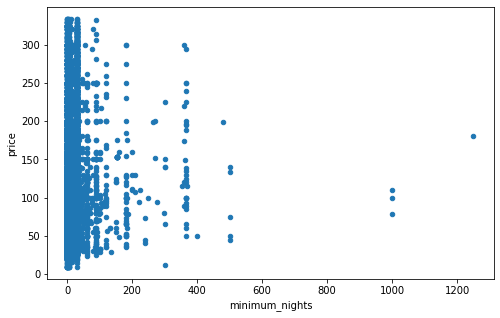

In [ ]:
# #price vs minimum night
df_1.plot.scatter(x='minimum_nights',y = 'price')

#### Rooms Types Count in each Neighbourhood Group

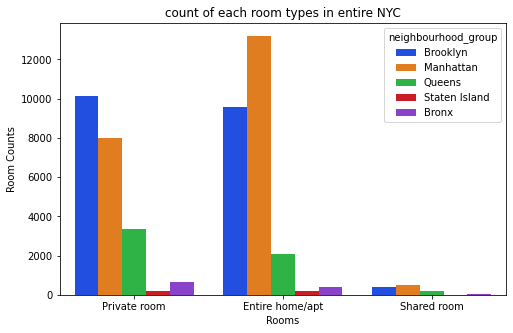

In [41]:
#rooms type count in different neighbourhood group
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(x='room_type',hue='neighbourhood_group',data=df, palette='bright')
plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.ylabel('Room Counts')

plt.show()

#### neighboor_group vs Price

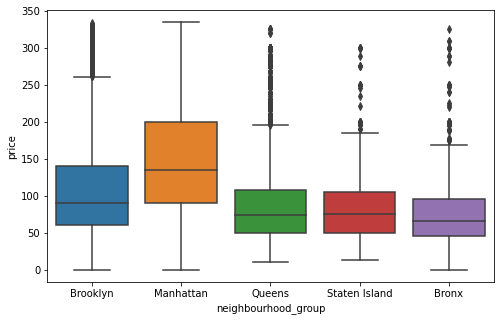

In [61]:
ax= sns.boxplot(x='neighbourhood_group',y='price',data=df_1)

#### Most 5 Expensive hotel

In [102]:
expensive = df.sort_values(by='price',ascending=False)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]
expensive[['name','price']]

,name,price
9151,Furnished room in Astoria apartment,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29238,1-BR Lincoln Center,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999


#### Cheapest hotel in each neighbourhood group

In [104]:
#cheapest
cheapest_df= df_1.loc[df_1.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
25433,Bronx,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,0
23161,Brooklyn,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,0
26259,Manhattan,the best you can find,Qiuchi,0
22835,Queens,IT'S SIMPLY CONVENIENT!,Maria,10
45646,Staten Island,Happy Home 3,Raquel,13


We have not alter the rows with price value '0' because it may have the provision of 0 price scheme

#### Top Neignbourhood with Respect to Average Price per Day

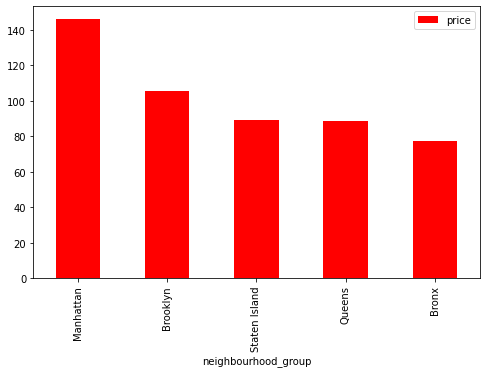

In [109]:
#Grouping by neighbourhood group and price
df_ngrp= df_1.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
df_ngrp.plot(y='price',x='neighbourhood_group',kind='bar',color='r')

#### Room Type count vs neignbourhood group

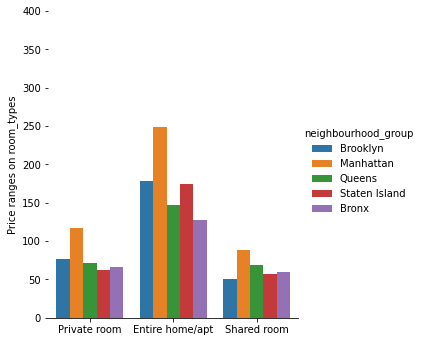

In [83]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", hue="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar",  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=0)
  .set(ylim=(0, 400))
  .despine(left=True)) 

#### Min Night vs Room Types

Text(0, 0.5, 'Min Stays')

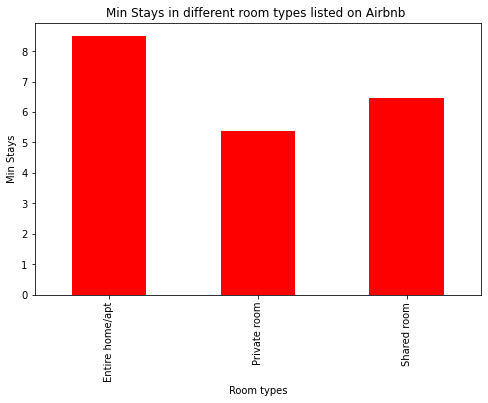

In [84]:

df.groupby('room_type')['minimum_nights'].mean().plot(kind='bar',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')


#### Most Review RoomType Vs Neighbourbood Groups

In [85]:
#reviews
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]


,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


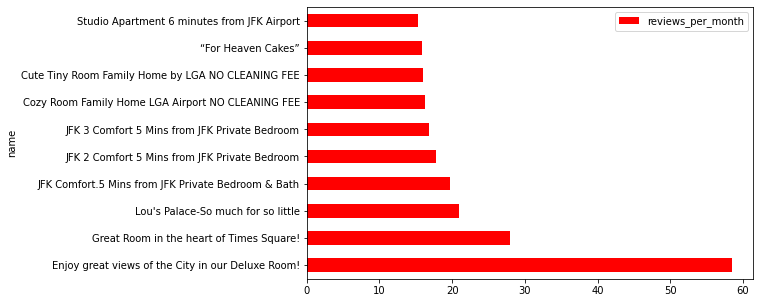

In [115]:
top10_reviewed_listings.plot(x='name',y='reviews_per_month',kind='barh',color='r')

So 'Enjoy great views of the City in our Deluxe Room!' is the most review room in NYC...


#### Number of Reviewed Room Types in Each Neighbourhood Groups

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

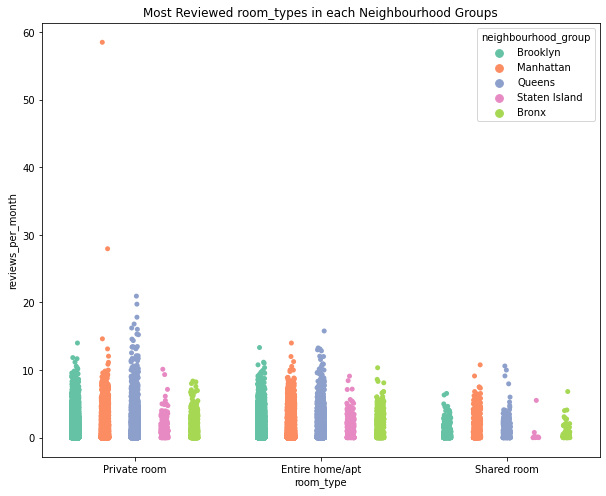

In [86]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',
                  y='reviews_per_month',
                  hue='neighbourhood_group',dodge=True,
                  data=df,palette='Set2')
ax.set_title(
    'Number of Reviewed room_types in each Neighbourhood Groups')

#### Top 10 Review per Month received by host

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

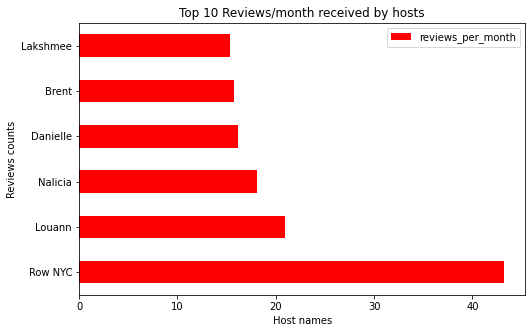

In [87]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='barh',color='r')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

#### Host with Most Number of Listing Count

In [93]:
host_with_most_listings= df.groupby(['host_name'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count').reset_index()


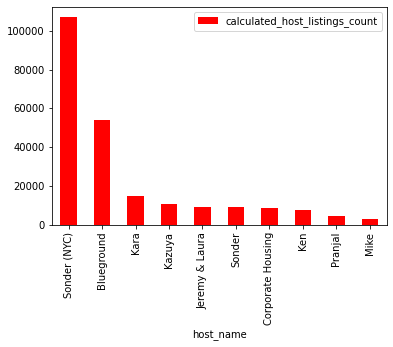

In [28]:
largest_listings_df.plot(x='host_name',y='calculated_host_listings_count',kind='bar',color='r')

#### Neighbourhood Group vs Room Availability

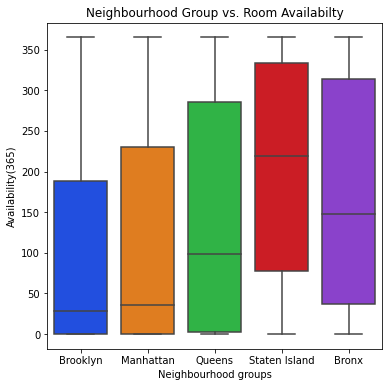

In [89]:
f,ax = plt.subplots(figsize=(6,6))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

#### Latitude and longitude


Text(0.5, 1.0, 'Location Co-ordinates')

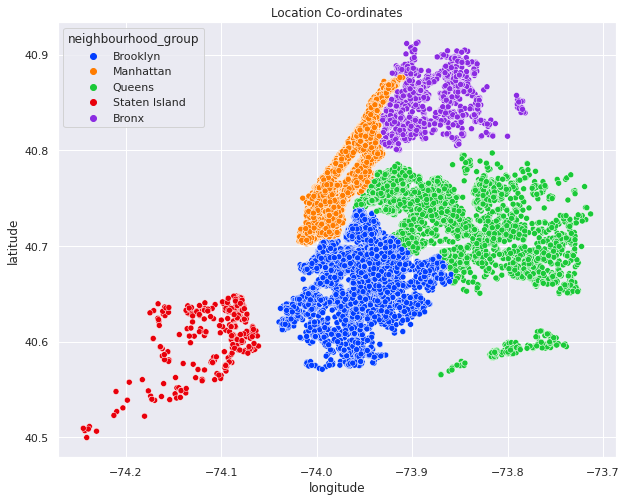

In [118]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

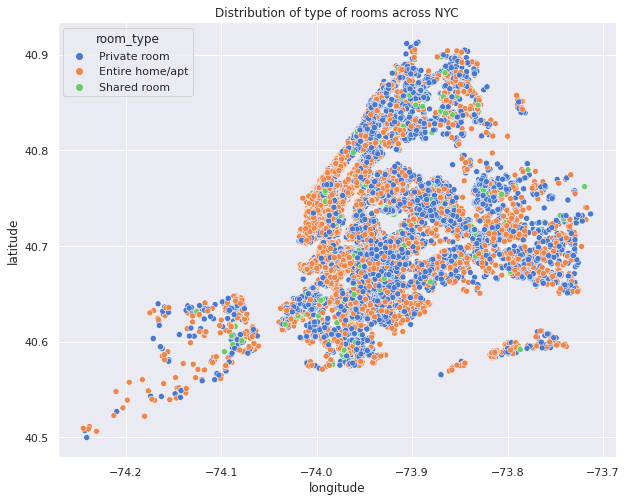

In [122]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,
                    palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

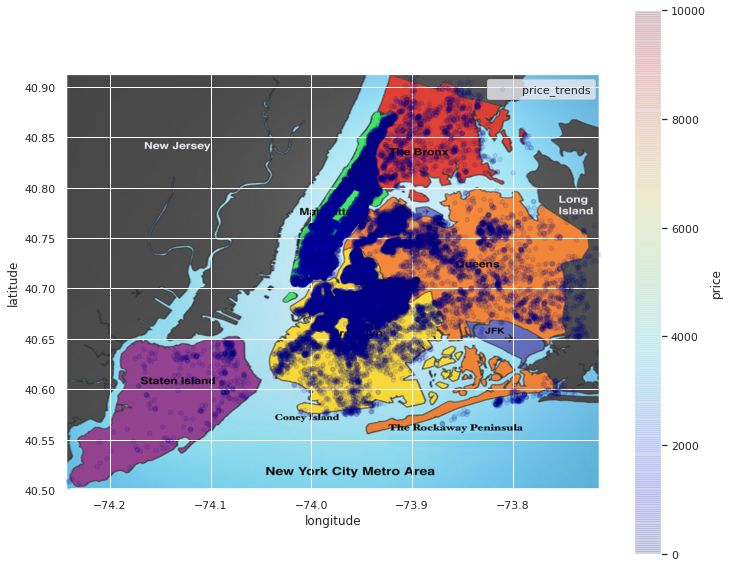

In [126]:
plt.figure(figsize=(12,10))
img=plt.imread('/content/drive/MyDrive/AlmaBetter/6_the-rockaway-penisula-map.jpg.crdownload')
plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.1, figsize=(12,10))
plt.legend()
plt.show()